In [3]:
import pandas as pd
df = pd.read_csv("sp500 (1).csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,03-01-1950,16.66,16.66,16.66,16.66,1260000,0,0
1,04-01-1950,16.85,16.85,16.85,16.85,1890000,0,0
2,05-01-1950,16.93,16.93,16.93,16.93,2550000,0,0
3,06-01-1950,16.98,16.98,16.98,16.98,2010000,0,0
4,09-01-1950,17.08,17.08,17.08,17.08,2520000,0,0


In [4]:
# Data Preprocessing

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
missing_values = df[['Date', 'Open', 'Dividends']].isnull().sum()

# Filter out the columns we are interested in
df_filtered = df[['Date', 'Open', 'Dividends']]

missing_values, df_filtered.head()


C:\Users\user\AppData\Local\Temp\ipykernel_9460\2074223796.py:4: UserWarning: Parsing '13-01-1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_9460\2074223796.py:4: UserWarning: Parsing '16-01-1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_9460\2074223796.py:4: UserWarning: Parsing '17-01-1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_9460\2074223796.py:4: UserWarning: Parsing '18-01-1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\user\AppData\Local\Temp\ipykern

(Date         0
 Open         0
 Dividends    0
 dtype: int64,
         Date   Open  Dividends
 0 1950-03-01  16.66          0
 1 1950-04-01  16.85          0
 2 1950-05-01  16.93          0
 3 1950-06-01  16.98          0
 4 1950-09-01  17.08          0)

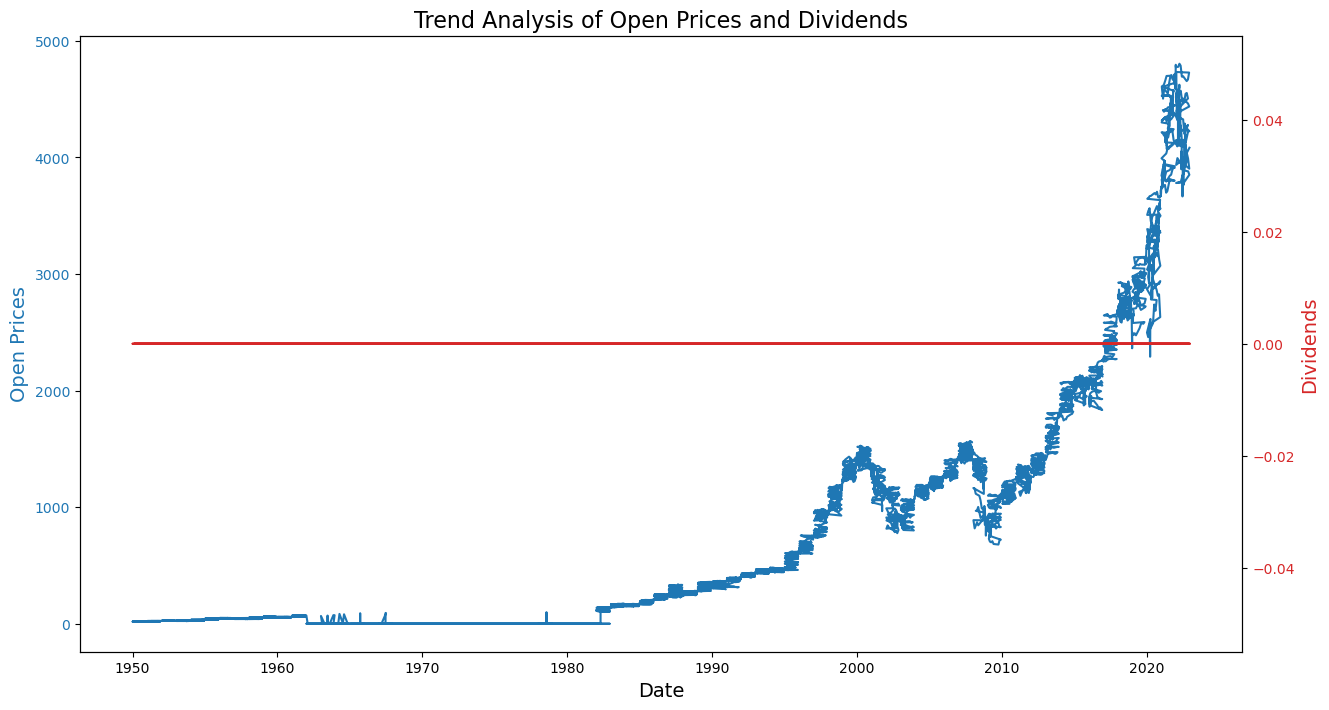

In [5]:
import matplotlib.pyplot as plt

# Plotting the trends

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting 'Open' prices
color = 'tab:blue'
ax1.set_title('Trend Analysis of Open Prices and Dividends', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Open Prices', fontsize=14, color=color)
ax1.plot(df_filtered['Date'], df_filtered['Open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for the 'Dividends'
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Dividends', fontsize=14, color=color)
ax2.plot(df_filtered['Date'], df_filtered['Dividends'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


In [6]:
# Feature Engineering: Creating lagged features

# Number of lagged features
n_lags = 5

# Create lagged features for 'Open'
for i in range(1, n_lags + 1):
    df_filtered[f'Open_Lag_{i}'] = df_filtered['Open'].shift(i)

# Create lagged features for 'Dividends'
for i in range(1, n_lags + 1):
    df_filtered[f'Dividends_Lag_{i}'] = df_filtered['Dividends'].shift(i)

# Drop the rows with NaN values generated due to lagging
df_filtered.dropna(inplace=True)

df_filtered.head()


C:\Users\user\AppData\Local\Temp\ipykernel_9460\2998933396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Open_Lag_{i}'] = df_filtered['Open'].shift(i)
C:\Users\user\AppData\Local\Temp\ipykernel_9460\2998933396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Open_Lag_{i}'] = df_filtered['Open'].shift(i)
C:\Users\user\AppData\Local\Temp\ipykernel_9460\2998933396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Date,Open,Dividends,Open_Lag_1,Open_Lag_2,Open_Lag_3,Open_Lag_4,Open_Lag_5,Dividends_Lag_1,Dividends_Lag_2,Dividends_Lag_3,Dividends_Lag_4,Dividends_Lag_5
5,1950-10-01,17.030001,0,17.080000,16.980000,16.930000,16.850000,16.66,0.0,0.0,0.0,0.0,0.0
6,1950-11-01,17.090000,0,17.030001,17.080000,16.980000,16.930000,16.85,0.0,0.0,0.0,0.0,0.0
7,1950-12-01,16.760000,0,17.090000,17.030001,17.080000,16.980000,16.93,0.0,0.0,0.0,0.0,0.0
8,1950-01-13,16.670000,0,16.760000,17.090000,17.030001,17.080000,16.98,0.0,0.0,0.0,0.0,0.0
9,1950-01-16,16.719999,0,16.670000,16.760000,17.090000,17.030001,17.08,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

# Drop the 'Date' column as it's not needed for model training
df_filtered.drop(columns=['Date'], inplace=True)

# Features and target variable
X = df_filtered.drop(columns=['Open'])
y = df_filtered['Open']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape


((14629, 11), (3658, 11))

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the 'Open' prices for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(774.763857333951, 1177.2124702904005)

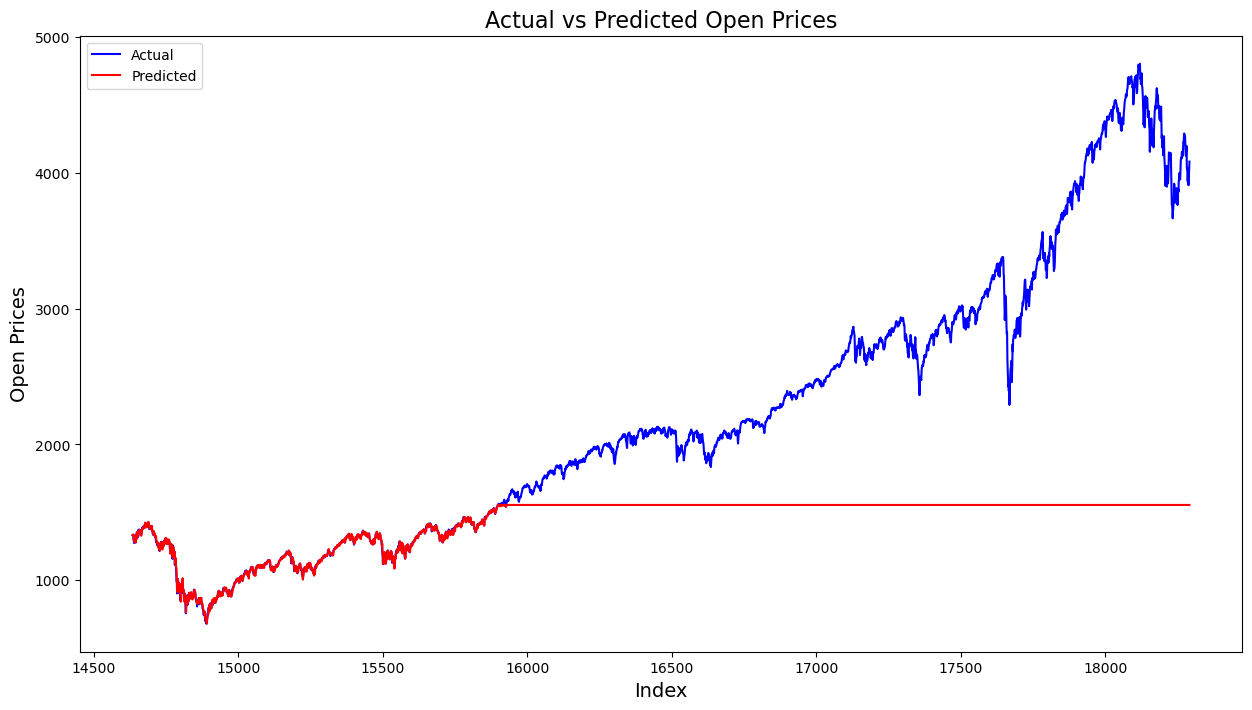

In [9]:
# Visualizing the predictions

# Create a DataFrame for visualization
df_visualization = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the actual vs predicted values
plt.figure(figsize=(15, 8))
plt.plot(df_visualization.index, df_visualization['Actual'], label='Actual', color='b')
plt.plot(df_visualization.index, df_visualization['Predicted'], label='Predicted', color='r')
plt.title('Actual vs Predicted Open Prices', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Open Prices', fontsize=14)
plt.legend()
plt.show()


In [10]:
# Tweaking the Random Forest Model by increasing the number of trees and adjusting max_depth

# Initialize the tweaked Random Forest Regressor
tweaked_rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)

# Train the model
tweaked_rf_model.fit(X_train, y_train)

# Predict the 'Open' prices for the test set
tweaked_y_pred = tweaked_rf_model.predict(X_test)

# Evaluate the tweaked model
tweaked_mae = mean_absolute_error(y_test, tweaked_y_pred)
tweaked_rmse = np.sqrt(mean_squared_error(y_test, tweaked_y_pred))

tweaked_mae, tweaked_rmse


(774.4943067976848, 1176.9684119361993)

In [11]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict the 'Open' prices for the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))

xgb_mae, xgb_rmse


(779.3201902599155, 1182.064020699391)